# 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

## 데이터 가져오기

In [2]:
diabetes = load_diabetes()

In [3]:
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [4]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

- age: 나이
- sex: 성별
- bmi: BMI(Body mass index)지수
- bp: 평균혈압
- s1~s6: 6종류의 혈액검사수치

In [5]:
print(diabetes.target.shape)
print(diabetes.data.shape)
print('======================')
print(diabetes.target)

(442,)
(442, 10)
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.

In [6]:
df_X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_y = pd.DataFrame(diabetes.target, columns=["MEDV"])

독립변수과 종속변수 데이터프레임을 하나의 데이터프레임으로 묶어두면 편리하다.

In [7]:
df_combined = pd.concat([df_X, df_y], axis=1)
df_combined.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,MEDV
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


일단 살펴보기

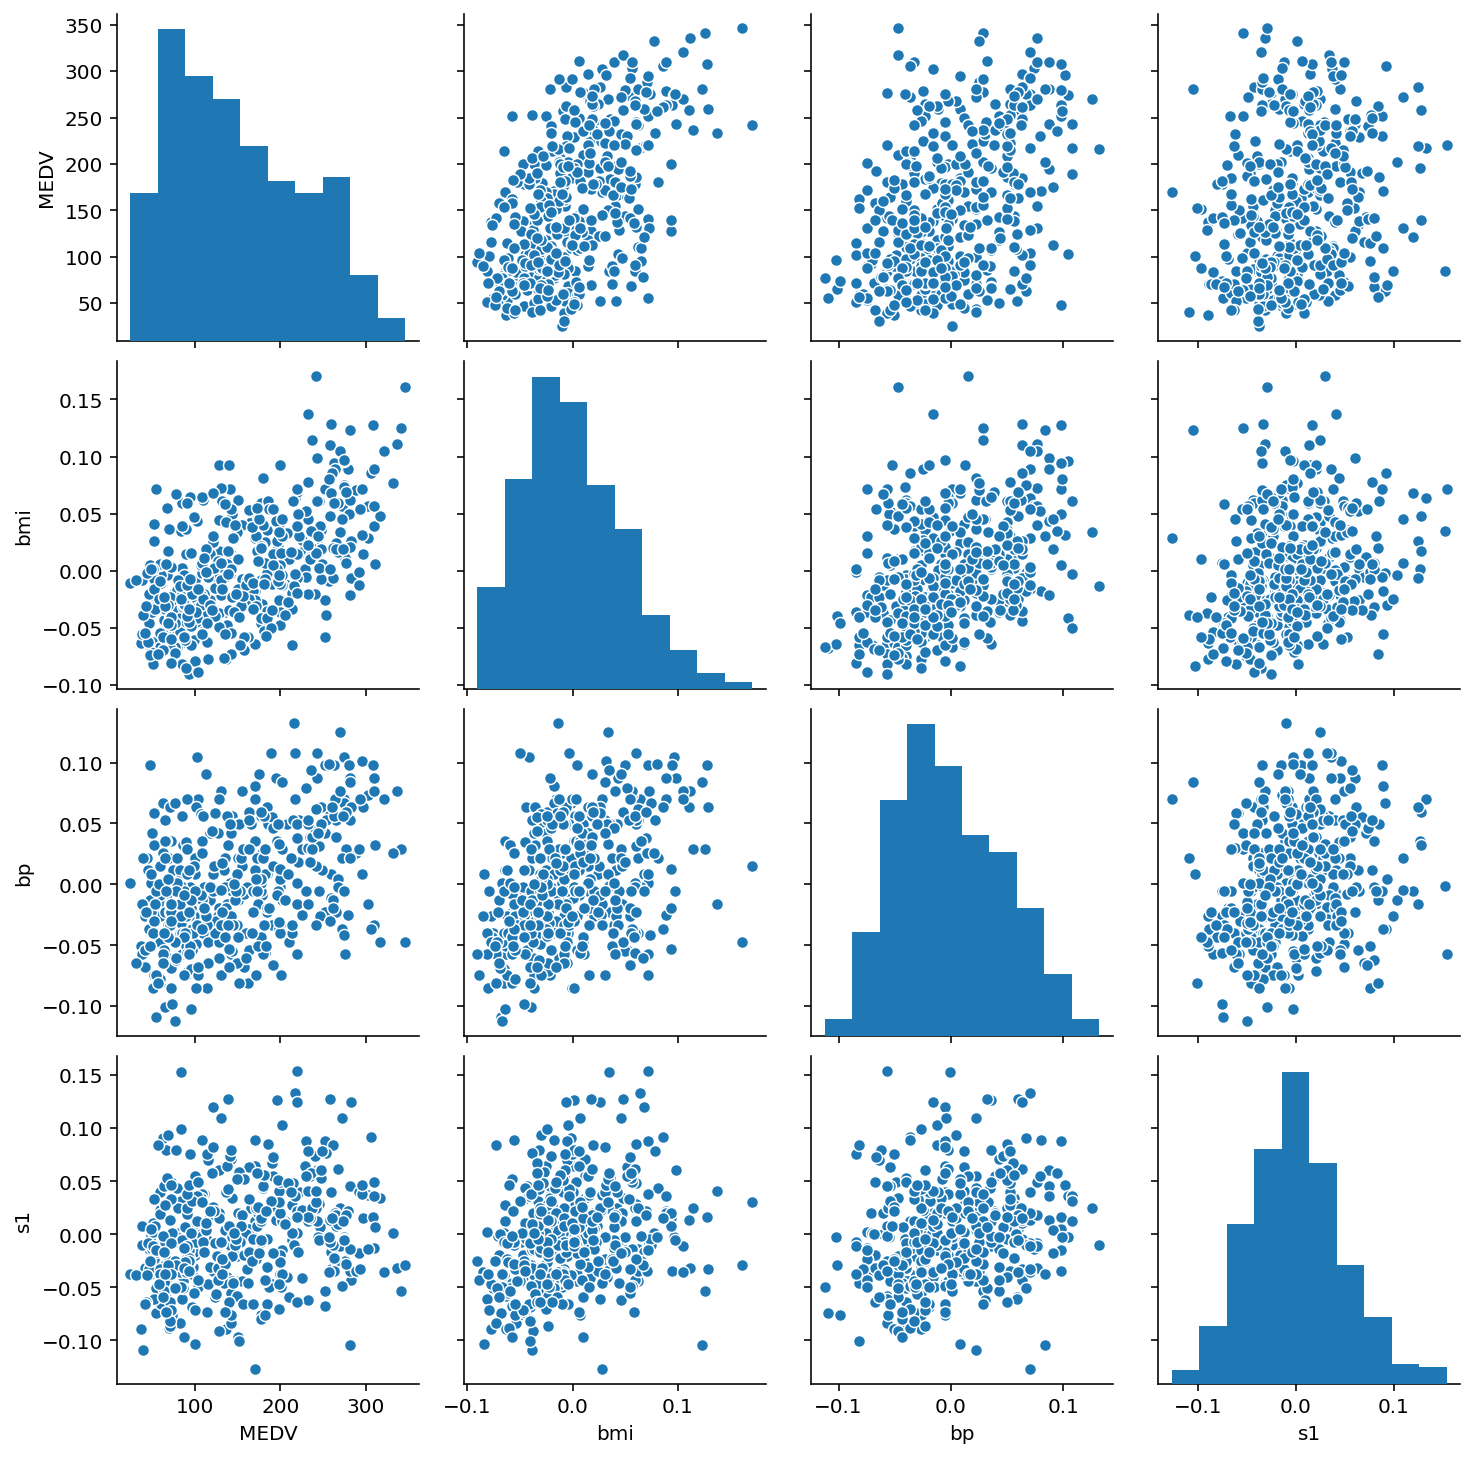

In [8]:
sns.pairplot(df_combined[["MEDV", "bmi", "bp", "s1"]])
plt.show()

## 모델에 입력할 데이터 X,Y 준비하기

In [9]:
columns_all = ['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6']
columns_1 = ['age','sex','bmi','bp','s1']
X = df_combined[columns_all].values
y = df_combined['MEDV'].values

In [10]:
X.shape

(442, 10)

In [11]:
y.shape

(442,)

## train 데이터와 test 데이터로 분리하기

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(353, 10)
(89, 10)
(353,)
(89,)


## 모델 준비하기

In [14]:
NUM_WEIGHTS = 10
W = np.random.rand(NUM_WEIGHTS)
b = np.random.rand()

In [15]:
print(W.shape)
print(b)

(10,)
0.7824963115207741


In [16]:
def model(X, W, b):
    predictions = 0
    for i in range(NUM_WEIGHTS):
        predictions += X[:, i] * W[i]
    predictions += b
    
    return predictions

## 손실함수 만들기

In [17]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [18]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

## gradient 함수 만들기

In [19]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()    
    return dW, db


In [20]:
dW, db = gradient(X, W, b, y)
print("dW:", dW.shape)
print("db:", db)

dW: (10,)
db: -302.70197570275025


## Learning Rate 설정

In [21]:
LEARNING_RATE = 0.0001

## 모델 학습하기

In [22]:
losses = []
epoch = 200001
for i in range(1, epoch):
    dW, db = gradient(X, W, b, y)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X, W, b, y)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 20955.4787
Iteration 2000 : Loss 15614.4848
Iteration 3000 : Loss 11978.9392
Iteration 4000 : Loss 9493.3349
Iteration 5000 : Loss 7784.3715
Iteration 6000 : Loss 6601.0187
Iteration 7000 : Loss 5774.3205
Iteration 8000 : Loss 5190.4356
Iteration 9000 : Loss 4772.5508
Iteration 10000 : Loss 4468.7460
Iteration 11000 : Loss 4243.8485
Iteration 12000 : Loss 4073.9648
Iteration 13000 : Loss 3942.8066
Iteration 14000 : Loss 3839.2223
Iteration 15000 : Loss 3755.5362
Iteration 16000 : Loss 3686.4306
Iteration 17000 : Loss 3628.1924
Iteration 18000 : Loss 3578.2046
Iteration 19000 : Loss 3534.6027
Iteration 20000 : Loss 3496.0411
Iteration 21000 : Loss 3461.5353
Iteration 22000 : Loss 3430.3538
Iteration 23000 : Loss 3401.9437
Iteration 24000 : Loss 3375.8806
Iteration 25000 : Loss 3351.8323
Iteration 26000 : Loss 3329.5352
Iteration 27000 : Loss 3308.7761
Iteration 28000 : Loss 3289.3805
Iteration 29000 : Loss 3271.2032
Iteration 30000 : Loss 3254.1222
Iteration 31000 

## loss 시각화해보기

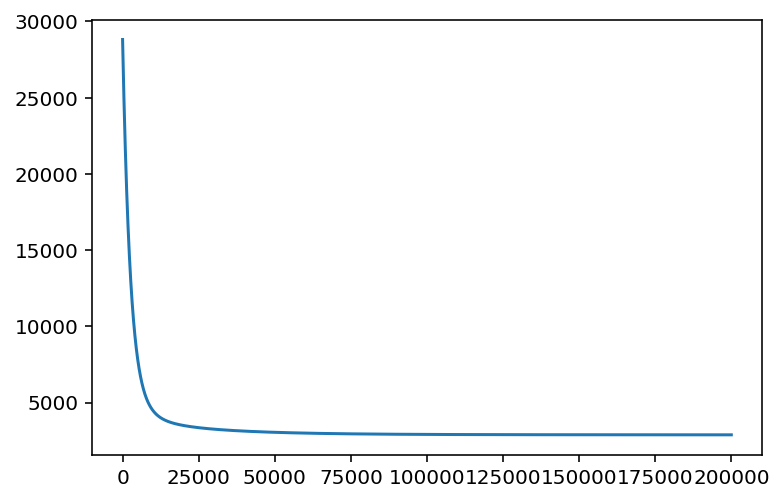

In [23]:
plt.plot(losses)
plt.show()

## test 데이터에서 성능 확인해보기

In [24]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2764.9573413034423

## 실제와 예측값 비교 시각화
x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

여기서 첫 번째 컬럼은 나이

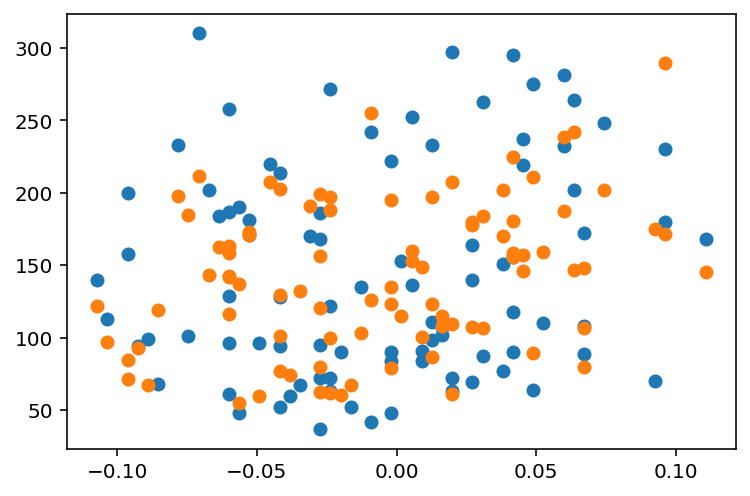

In [25]:
plt.scatter(X_test[:,0], y_test)
plt.scatter(X_test[:,0], prediction)
plt.show()

# 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

## 데이터 가져오기

In [26]:
train = pd.read_csv('~/aiffel/bike-sharing-demand/train.csv')
print(train.shape)
# train.head()
df = pd.DataFrame(train)
df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [27]:
df['datetime'] =  pd.to_datetime(df['datetime'])

In [28]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [29]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['second'] = df['datetime'].dt.second

In [30]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


## year, month, day, hour, minute, second 데이터 개수 시각화하기

sns.countplot 활용해서 시각화하기   
subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

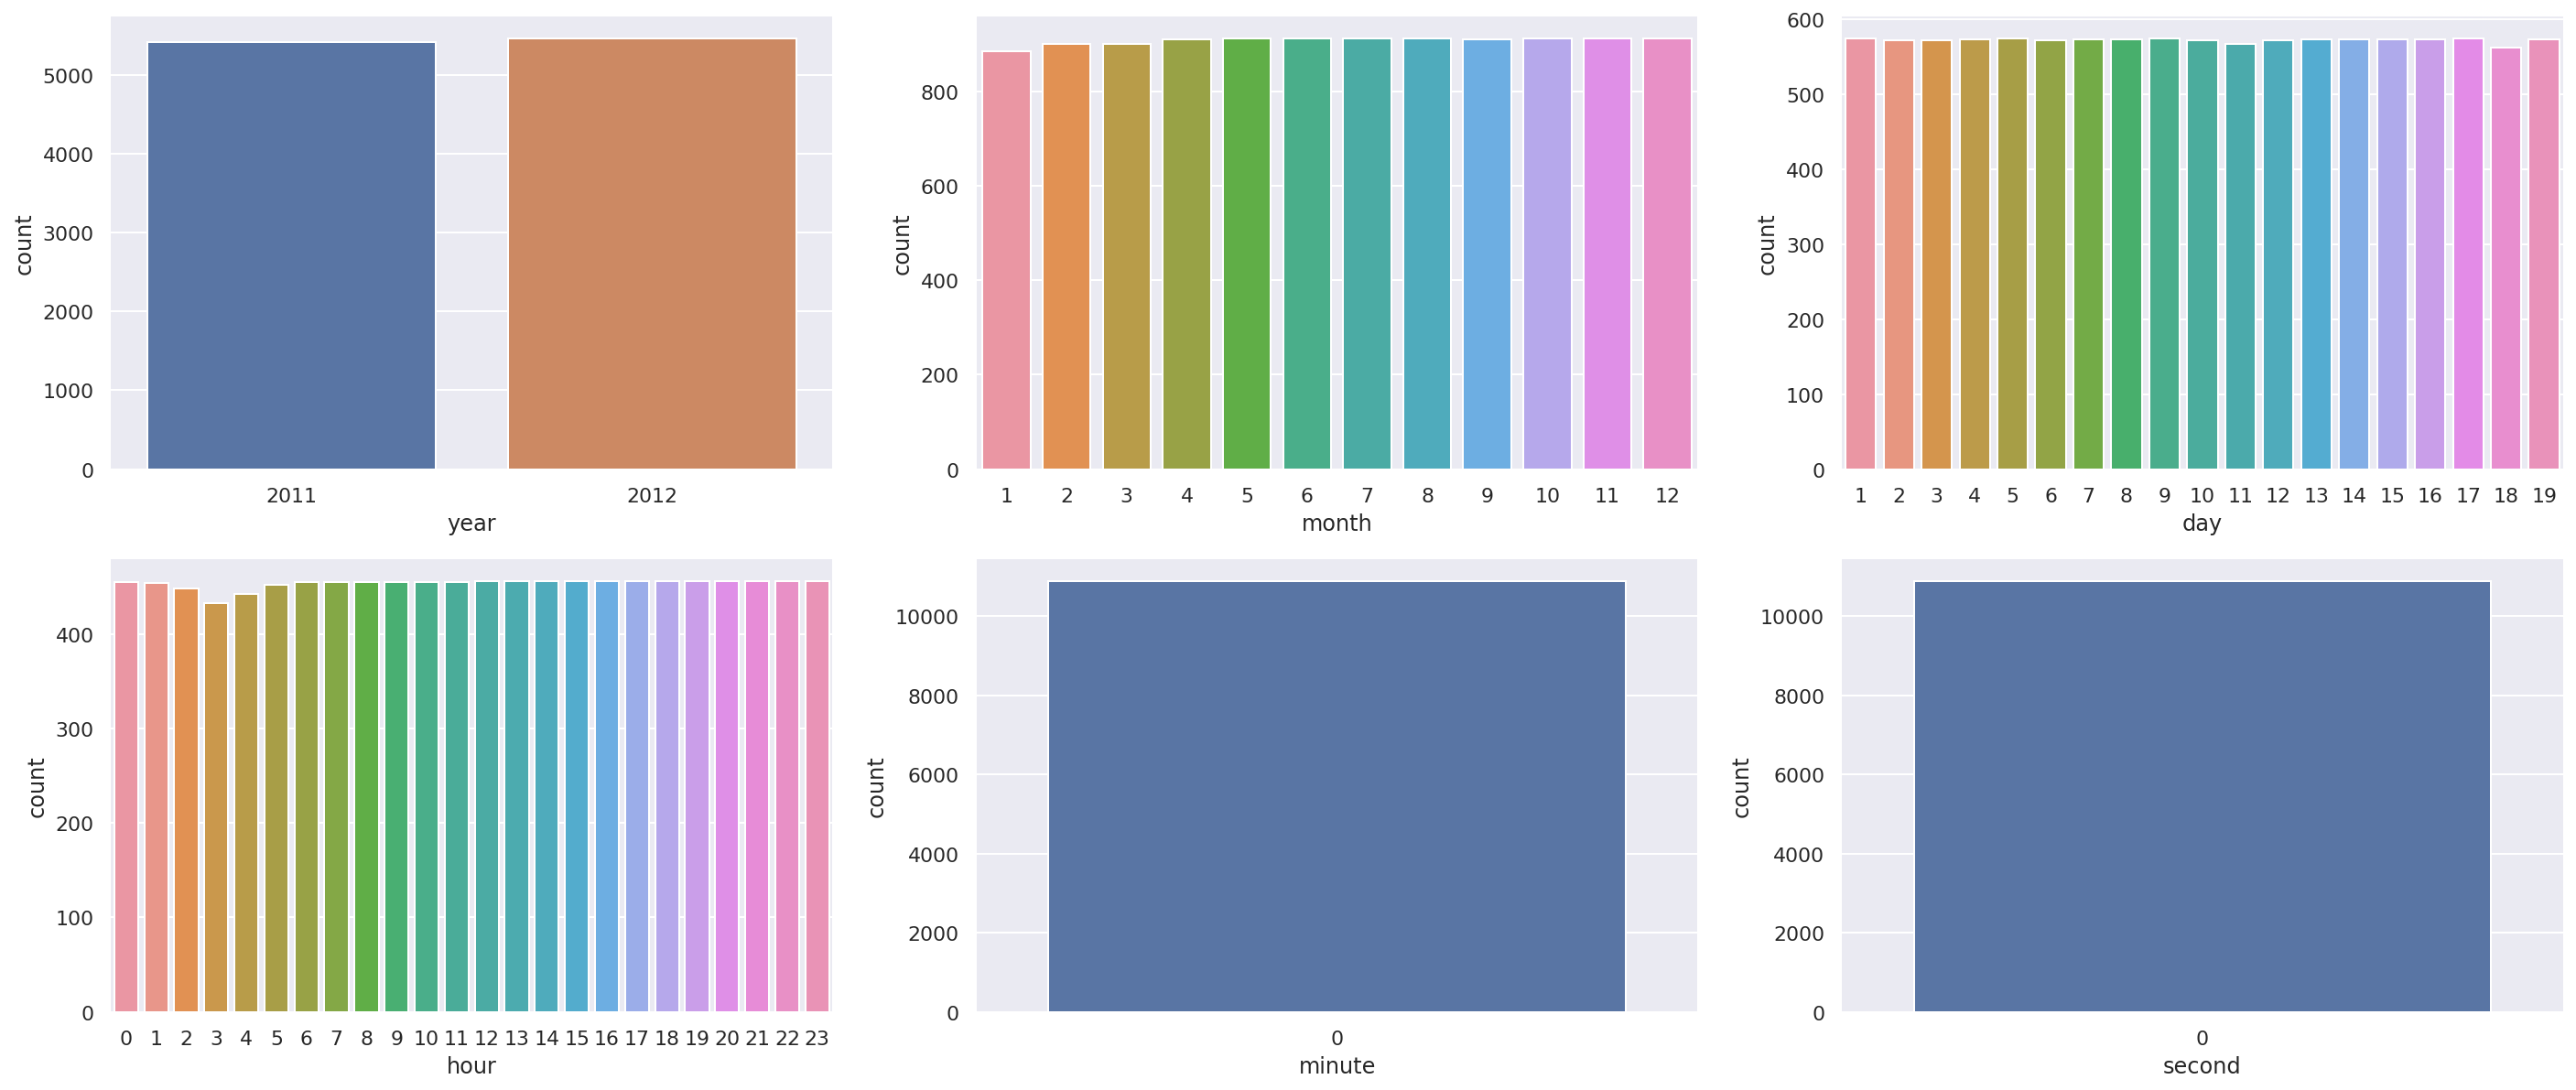

In [31]:
sns.set(style="darkgrid", color_codes=True)

date_columns = ['year','month','day','hour','minute','second']

f, axes = plt.subplots(2, 3, figsize=(24, 10))
sns.despine(left=True)

for idx in range(len(date_columns)):
    
    sns.countplot(x=date_columns[idx], data =df, ax=axes[idx//3, idx%3])    

plt.show()

## X, y 컬럼 선택 및 train/test 데이터 분리

In [32]:
print(df.columns.values)
# datetime 제외 (이미 다 분리해서 넣어놨음)
x_columns_all = ['season','holiday','workingday','weather','temp','atemp',
 'humidity','windspeed','casual','registered', 'year', 'month', 'day',
 'hour', 'minute', 'second']
x_columns = ['season','holiday','workingday','weather','temp','atemp',
 'humidity','windspeed','casual','registered', 'year', 'month', 'day',
 'hour', 'minute', 'second']
y_column_key = 'count'

df_X = pd.DataFrame(df, columns=x_columns)
df_y = pd.DataFrame(df, columns=[y_column_key])

['datetime' 'season' 'holiday' 'workingday' 'weather' 'temp' 'atemp'
 'humidity' 'windspeed' 'casual' 'registered' 'count' 'year' 'month' 'day'
 'hour' 'minute' 'second']


In [33]:
df_X.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour,minute,second
0,1,0,0,1,9.84,14.395,81,0.0,3,13,2011,1,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,2011,1,1,1,0,0
2,1,0,0,1,9.02,13.635,80,0.0,5,27,2011,1,1,2,0,0
3,1,0,0,1,9.84,14.395,75,0.0,3,10,2011,1,1,3,0,0
4,1,0,0,1,9.84,14.395,75,0.0,0,1,2011,1,1,4,0,0


In [34]:
df_y.head()

,count
0,16
1,40
2,32
3,13
4,1


In [35]:
X = df_X[x_columns].values
y = df_y[y_column_key].values

In [36]:
X.shape

(10886, 16)

In [37]:
y.shape

(10886,)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8708, 16)
(2178, 16)
(8708,)
(2178,)


## LinearRegression 모델 학습

In [40]:
linear_regression_model = LinearRegression()

In [41]:
linear_regression_model.fit(X_train, y_train)

LinearRegression()

## 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

### 예측값

In [42]:
predictions = linear_regression_model.predict(X_test)
predictions

array([127.,  13., 163., ..., 509.,   5., 239.])

### MSE

In [43]:
mse = mean_squared_error(y_test, predictions)
mse

1.6053136558001711e-25

### RMSE

In [44]:
rmse = sqrt(mse)
rmse

4.0066365642520797e-13

## x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

### temp

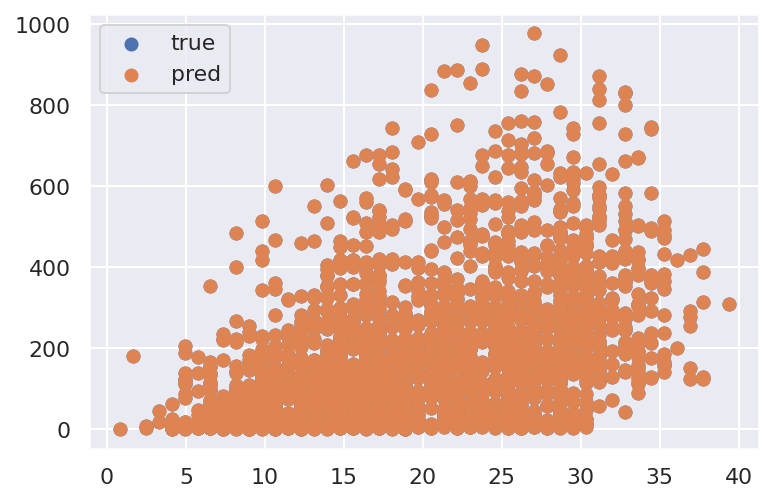

In [45]:
plt.scatter(X_test[:, 4], y_test, label="true")
plt.scatter(X_test[:, 4], predictions, label="pred")
plt.legend()
plt.show()

### humidity

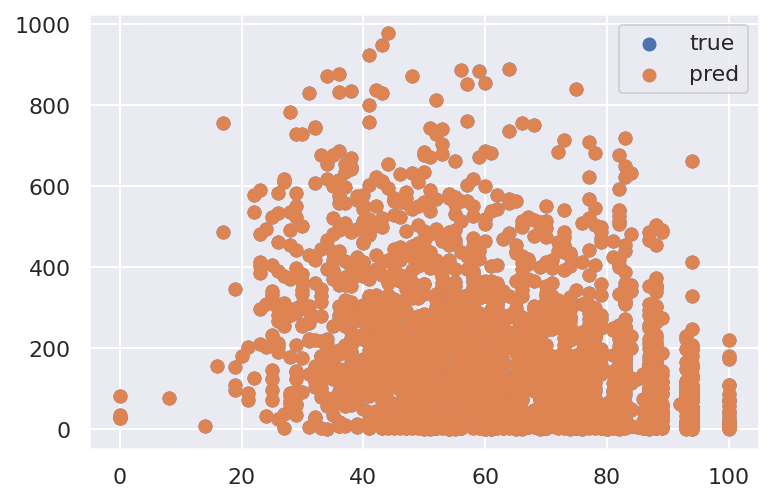

In [46]:
plt.scatter(X_test[:, 6], y_test, label="true")
plt.scatter(X_test[:, 6], predictions, label="pred")
plt.legend()
plt.show()

## 시각화 해보니, 전체 컬럼을 사용하는 것은 문제가 있음.
count = casual + registered 의 관계가 있기 때문에, 해당 컬럼들을 제외하고 해본다.

In [47]:
# casual, registered 컬럼 제외
x_columns = ['season','holiday','workingday','weather','temp','atemp',
 'humidity','windspeed', 'year', 'month', 'day',
 'hour', 'minute', 'second']

In [48]:
X = df_X[x_columns].values
y = df_y[y_column_key].values

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8708, 14)
(2178, 14)
(8708,)
(2178,)


In [50]:
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [51]:
predictions = linear_regression_model.predict(X_test)
predictions

array([248.10627003,  48.79765547, 200.90676727, ..., 309.7528022 ,
        38.17030198, 243.62697388])

In [52]:
mse = mean_squared_error(y_test, predictions)
mse

19945.370053753697

In [53]:
rmse = sqrt(mse)
rmse

141.22807813517005

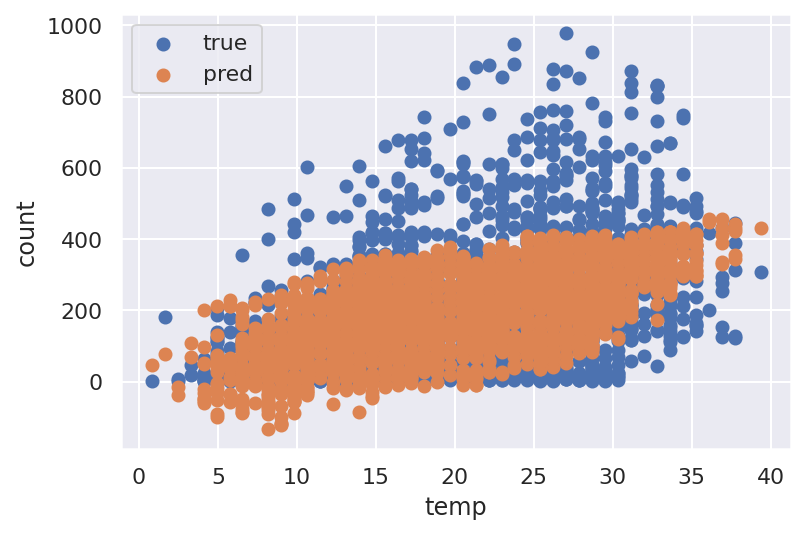

In [54]:
plt.scatter(X_test[:, 4], y_test, label="true")
plt.scatter(X_test[:, 4], predictions, label="pred")
plt.xlabel('temp')
plt.ylabel('count')
plt.legend()
plt.show()

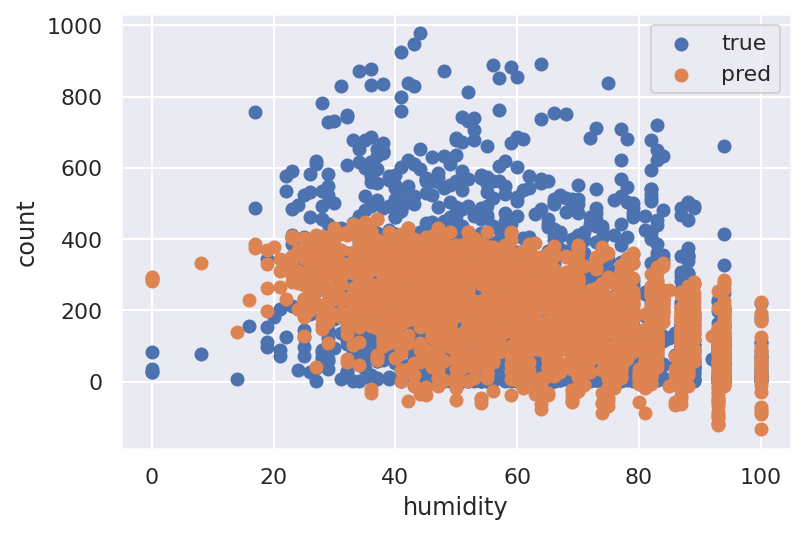

In [55]:
plt.scatter(X_test[:, 6], y_test, label="true")
plt.scatter(X_test[:, 6], predictions, label="pred")
plt.xlabel('humidity')
plt.ylabel('count')
plt.legend()
plt.show()

# 결과보고서

사이킷런을 사용하지 않고, 직접 손실함수를 구현해보고, gradient 계산 식을 이행하는 gradient 함수를 만들어보는 과정이 매우 흥미로웠다.   
그리고 프로젝트 2에서 구하고자 하는 값인 'count' 의 값과 casual, registered feature 간의 상관관계를 인지하고 해당 상관관계를 없애고 학습을 진행했을 때 합리적인 결과가 도출되는 것을 발견한 것이 흥미로웠다.